# Color Image CNN - CIFAR10

https://www.cs.toronto.edu/~kriz/cifar.html

### 1. 데이터 로드

In [1]:
from torchvision.datasets import CIFAR10
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = CIFAR10(root='./', train=True, download=True, transform=transform)
testset = CIFAR10(root='./', train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:13<00:00, 13.0MB/s]


In [2]:
from torch.utils.data import DataLoader

batch_size = 64
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [3]:
train_iter = iter(train_loader)
images, labels = next(train_iter)

print(images.shape)
print(labels.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])


In [4]:
first_image, first_label = images[0], labels[0]
print(first_image)
print(first_label)
print(trainset.classes)

tensor([[[ 0.8902,  0.9059,  0.9137,  ...,  0.5843,  0.5765,  0.5529],
         [ 0.9216,  0.9137,  0.9137,  ...,  0.5765,  0.5765,  0.5686],
         [ 0.9294,  0.9294,  0.9373,  ...,  0.5922,  0.6000,  0.5922],
         ...,
         [ 0.4667,  0.1216, -0.3098,  ..., -0.3569, -0.2784, -0.0824],
         [ 0.4275,  0.2235, -0.2078,  ..., -0.2314, -0.0118,  0.2471],
         [ 0.3804,  0.2471, -0.1294,  ...,  0.1137,  0.3333,  0.5294]],

        [[ 0.9137,  0.9059,  0.9137,  ...,  0.7725,  0.7490,  0.7255],
         [ 0.9451,  0.9216,  0.9137,  ...,  0.7882,  0.7647,  0.7412],
         [ 0.9529,  0.9294,  0.9451,  ...,  0.8039,  0.7961,  0.7804],
         ...,
         [ 0.5137,  0.2078, -0.2392,  ..., -0.2392, -0.2078, -0.0745],
         [ 0.4980,  0.3255, -0.0824,  ..., -0.1529, -0.0275,  0.2000],
         [ 0.4588,  0.3490,  0.0039,  ...,  0.0902,  0.2863,  0.4980]],

        [[ 0.9216,  0.9216,  0.9294,  ...,  0.8196,  0.8431,  0.8510],
         [ 0.9529,  0.9373,  0.9294,  ...,  0

### 2. 데이터 시각화

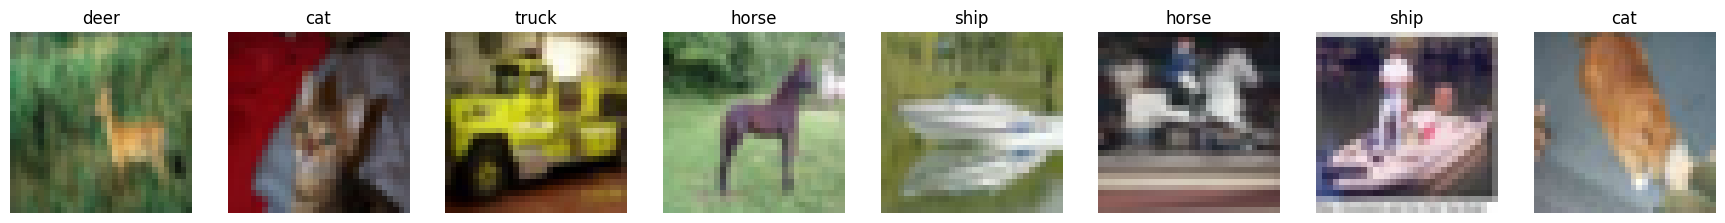

In [6]:
import matplotlib.pyplot as plt
import torch

loader = DataLoader(trainset, batch_size=16, shuffle=True)
images, labels = next(iter(loader))

fig, axes = plt.subplots(1, 8, figsize=(22, 4))

for i in range(8):
  img = images[i].permute(1, 2, 0)
  img = (img * 0.5) + 0.5
  img = torch.clamp(img, 0, 1)

  axes[i].imshow(img.numpy())
  axes[i].set_title(trainset.classes[labels[i]])
  axes[i].axis('off')

plt.show()

### 3. 모델 생성

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CIFAR10_CNN(nn.Module):
  def __init__(self):
    super().__init__()

    # conv 블럭 1
    self.conv1_1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    self.conv1_2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    # conv 블럭 2
    self.conv2_1 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.conv2_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    # conv 블럭 3
    self.conv3_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.conv3_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

    # 완결연결층
    self.flatten = nn.Flatten()
    self.dropout1 = nn.Dropout(0.5)
    self.fc1 = nn.Linear(128 * 4 * 4, 300)
    self.dropout2 = nn.Dropout(0.3)
    self.fc2 = nn.Linear(300, 10)

  def forward(self, x):
    x = F.relu(self.conv1_1(x))
    x = F.relu(self.conv1_2(x))
    x = self.pool1(x)

    x = F.relu(self.conv2_1(x))
    x = F.relu(self.conv2_2(x))
    x = self.pool2(x)

    x = F.relu(self.conv3_1(x))
    x = F.relu(self.conv3_2(x))
    x = self.pool3(x)

    x = self.flatten(x)
    x = self.dropout1(x)
    x = F.relu(self.fc1(x))
    x = self.dropout2(x)
    return self.fc2(x)

In [8]:
model = CIFAR10_CNN()
print(model)

CIFAR10_CNN(
  (conv1_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=2048, out_features=300, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=300, out_features=10, bias=T

In [9]:
from torchsummary import summary

summary(model, (3, 32, 32), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
            Conv2d-2           [-1, 32, 32, 32]           9,248
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
            Conv2d-5           [-1, 64, 16, 16]          36,928
         MaxPool2d-6             [-1, 64, 8, 8]               0
            Conv2d-7            [-1, 128, 8, 8]          73,856
            Conv2d-8            [-1, 128, 8, 8]         147,584
         MaxPool2d-9            [-1, 128, 4, 4]               0
          Flatten-10                 [-1, 2048]               0
          Dropout-11                 [-1, 2048]               0
           Linear-12                  [-1, 300]         614,700
          Dropout-13                  [-1, 300]               0
           Linear-14                   

### 4. 모델 학습

In [10]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import random_split

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=3)

train_size = int(0.85 * len(trainset))
val_size = len(trainset) - train_size

train_dataset, val_dataset = random_split(trainset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [11]:
from tqdm import tqdm

history = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
}

epochs = 30

best_val_loss = float("inf")
patience = 5
patience_counter = 0

for epoch in tqdm(range(epochs)):
  model.train()
  train_loss = 0.0
  train_total = 0
  train_correct = 0

  for batch_idx, (images, labels) in enumerate(train_loader):
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    train_loss += loss.detach().cpu().item()
    _, pred = torch.max(outputs.data, 1)
    train_total += labels.size(0)
    train_correct += (pred == labels).sum().detach().cpu().item()

  model.eval()
  val_loss = 0.0
  val_total = 0
  val_correct = 0

  with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(val_loader):
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)

      val_loss += loss.detach().cpu().item()
      _, pred = torch.max(outputs.data, 1)
      val_total += labels.size(0)
      val_correct += (pred == labels).sum().detach().cpu().item()

  train_loss /= len(train_loader)
  val_loss /= len(val_loader)
  train_acc = train_correct / train_total
  val_acc = val_correct / val_total

  history["train_loss"].append(train_loss)
  history["train_acc"].append(train_acc)
  history["val_loss"].append(val_loss)
  history["val_acc"].append(val_acc)

  if (epoch + 1) % 5 == 0:
    print(f"Epoch [{epoch + 1}/{epochs}] {train_acc=:.4f} {train_loss=:.4f} {val_acc=:.4f} {val_loss=:.4f}")

  scheduler.step(val_loss)

  if val_loss < best_val_loss:
    best_val_loss = val_loss
    patience_counter = 0
  else:
    patience_counter += 1

  if patience_counter >= patience:
    print(f"조기 종료 ... epoch: {epoch + 1}")
    break

 17%|█▋        | 5/30 [01:32<07:38, 18.33s/it]

Epoch [5/30] train_acc=0.7296 train_loss=0.7687 val_acc=0.7407 val_loss=0.7421


 33%|███▎      | 10/30 [03:02<06:02, 18.12s/it]

Epoch [10/30] train_acc=0.8112 train_loss=0.5346 val_acc=0.7833 val_loss=0.6351


 50%|█████     | 15/30 [04:33<04:32, 18.16s/it]

Epoch [15/30] train_acc=0.8555 train_loss=0.4117 val_acc=0.7963 val_loss=0.6260


 50%|█████     | 15/30 [04:52<04:52, 19.49s/it]

조기 종료 ... epoch: 16


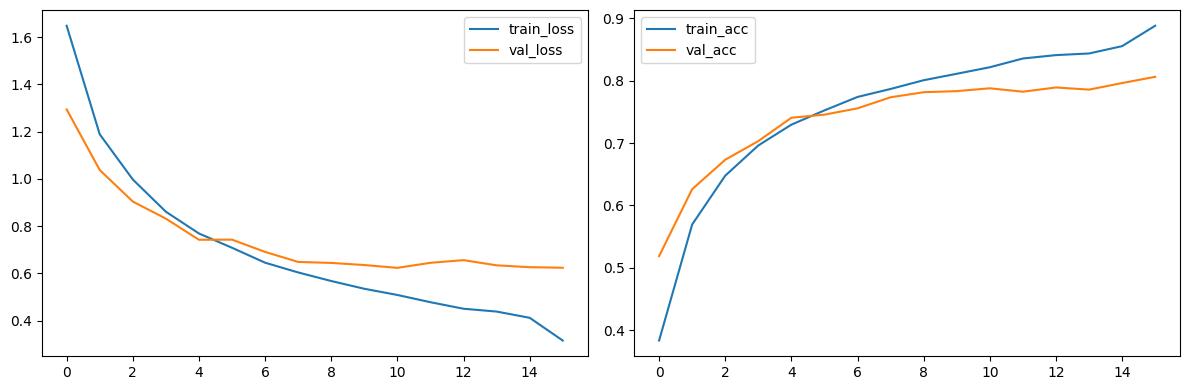

In [12]:
# 학습 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history["train_loss"], label="train_loss")
plt.plot(history["val_loss"], label="val_loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_acc"], label="train_acc")
plt.plot(history["val_acc"], label="val_acc")
plt.legend()

plt.tight_layout()
plt.show()

### 5. 모델 평가

In [13]:
model.eval()
test_loss = 0.0
test_total = 0
test_correct = 0

with torch.no_grad():
  for batch_idx, (images, labels) in enumerate(test_loader):
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)

    test_loss += loss.detach().cpu().item()
    _, pred = torch.max(outputs.data, 1)
    test_total += labels.size(0)
    test_correct += (pred == labels).sum().detach().cpu().item()

test_loss /= len(test_loader)
test_acc = test_correct / test_total

print(f"Test 결과: {test_acc=:.4f} {test_loss=:.4f}")

Test 결과: test_acc=0.8041 test_loss=0.6362
